1/Code for importing libraries and loading data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


base_path = 'C:/Users/Admin/Desktop/DATA/archive/'

matches = pd.read_csv(base_path + 'matches_1930_2022.csv')
ranking = pd.read_csv(base_path + 'fifa_ranking_2022-10-06.csv')
world_cup = pd.read_csv(base_path + 'world_cup.csv')



2/Country that hosted the most World Cup matches

In [32]:
host_counts = matches['Host'].value_counts().reset_index()
host_counts.columns = ['Country', 'Matches_Hosted']

print(" Countries that hosted the most World Cup matches:")
display(host_counts)

host_counts.head()

 Countries that hosted the most World Cup matches:


,Country,Matches_Hosted
0,Germany,102
1,Brazil,86
2,Mexico,84
3,France,82
4,Italy,69
5,Qatar,64
6,South Africa,64
7,"Korea Republic, Japan",64
8,Russia,64
9,United States,52


,Country,Matches_Hosted
0,Germany,102
1,Brazil,86
2,Mexico,84
3,France,82
4,Italy,69


3/Teams with the most wins in World Cup history

In [7]:
def get_winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['away_score'] > row['home_score']:
        return row['away_team']
    else:
        return None  

matches['winner'] = matches.apply(get_winner, axis=1)

win_counts = matches['winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']

print("Teams with the most wins in World Cup history:")
display(win_counts.head(10))

Teams with the most wins in World Cup history:


,Team,Wins
0,Brazil,76
1,Argentina,47
2,Italy,45
3,France,39
4,Germany,37
5,England,32
6,West Germany,31
7,Spain,31
8,Netherlands,30
9,Uruguay,25


4Home advantage

In [16]:
home_wins = matches[matches['home_score'] > matches['away_score']]['home_team'].value_counts()
away_wins = matches[matches['away_score'] > matches['home_score']]['away_team'].value_counts()

print(" Teams with the most home wins:")
print(home_wins.head())
print("\n Teams with the most away wins:")
print(away_wins.head())

 Teams with the most home wins:
home_team
Brazil       63
Argentina    42
Italy        38
Germany      28
France       27
Name: count, dtype: int64

 Teams with the most away wins:
away_team
Spain          14
Brazil         13
France         12
Netherlands    11
Croatia         9
Name: count, dtype: int64


5Number of teams that won the World Cup

C:\Users\Admin\AppData\Local\Temp\ipykernel_2520\648415859.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finals['winner'] = finals.apply(get_winner, axis=1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2520\648415859.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Titles', y='Team', data=title_counts, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_2520\648415859.py:25: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12

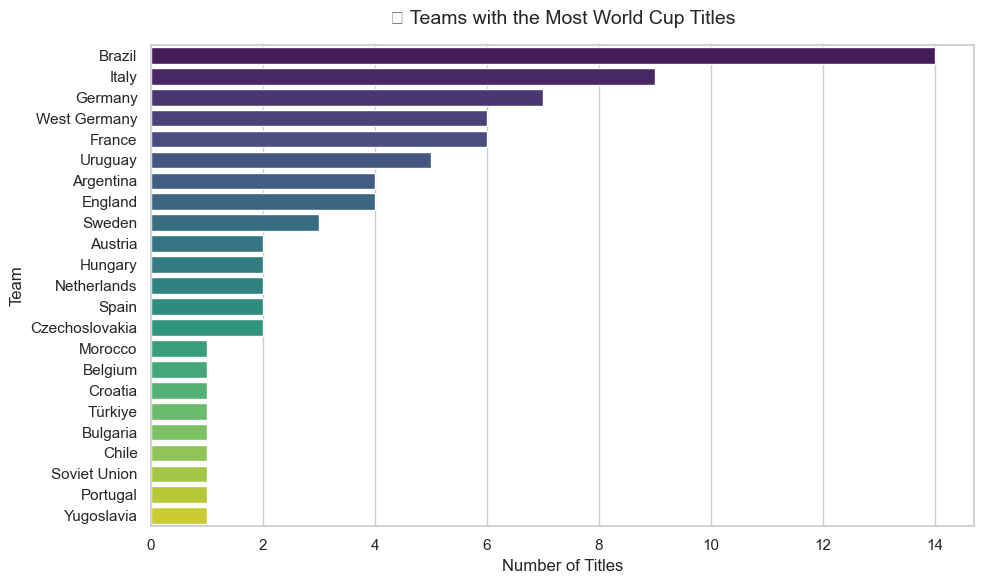

 Winning teams:


,Team,Titles
0,Brazil,14
1,Italy,9
2,Germany,7
3,West Germany,6
4,France,6
5,Uruguay,5
6,Argentina,4
7,England,4
8,Sweden,3
9,Austria,2


In [20]:
finals = matches[
    matches['Round'].str.lower().str.contains('final') & 
    ~matches['Round'].str.lower().str.contains('semi')
]

def get_winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['away_score'] > row['home_score']:
        return row['away_team']
    else:
        return 'Draw'

finals['winner'] = finals.apply(get_winner, axis=1)
finals = finals[finals['winner'] != 'Draw']

title_counts = finals['winner'].value_counts().reset_index()
title_counts.columns = ['Team', 'Titles']

plt.figure(figsize=(10, 6))
sns.barplot(x='Titles', y='Team', data=title_counts, palette='viridis')
plt.title('🏆 Teams with the Most World Cup Titles', fontsize=14, pad=15)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.tight_layout()

plt.show()

print(" Winning teams:")
display(title_counts)

6/Goals for each year with the host country

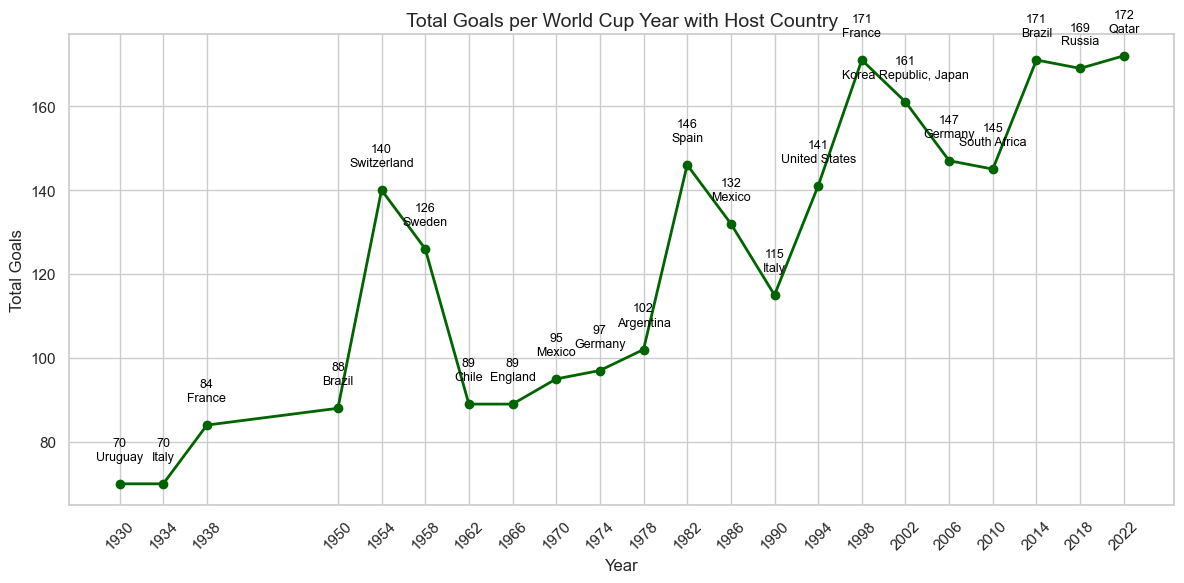

Total Goals and Host Country per World Cup Year:


,Year,Host,total_goals
0,1930,Uruguay,70
1,1934,Italy,70
2,1938,France,84
3,1950,Brazil,88
4,1954,Switzerland,140
5,1958,Sweden,126
6,1962,Chile,89
7,1966,England,89
8,1970,Mexico,95
9,1974,Germany,97


In [27]:

matches['total_goals'] = matches['home_score'] + matches['away_score']


goals_per_year = matches.groupby(['Year', 'Host'])['total_goals'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(goals_per_year['Year'], goals_per_year['total_goals'], marker='o', color='darkgreen', linewidth=2)

for i, row in goals_per_year.iterrows():
    plt.text(row['Year'], row['total_goals'] + 5, f"{int(row['total_goals'])}\n{row['Host']}", 
             ha='center', va='bottom', fontsize=9, color='black', wrap=True)

plt.title('Total Goals per World Cup Year with Host Country', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.xticks(goals_per_year['Year'], rotation=45)
plt.tight_layout()
plt.show()
print("Total Goals and Host Country per World Cup Year:")
display(goals_per_year)